In [1]:
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import time

In [2]:
combo_df = pd.read_csv('../data/skillshare_combined.csv')

In [3]:
del combo_df['Unnamed: 0']

In [4]:
col = 'day-1'

In [5]:
day_1_df = combo_df[['user_uid', 'success', col]]

In [6]:
day_1_df['mw_bucket'] = 'a. 0 min'
day_1_df['mw_bucket'][day_1_df[col] < 60.0] = 'b. 0-1'
day_1_df['mw_bucket'][day_1_df[col] >= 60.0] = 'b. 1-5'
day_1_df['mw_bucket'][day_1_df[col] >= 300.0] = 'c. 5-15'
day_1_df['mw_bucket'][day_1_df[col] >= 900.0] = 'd. 15-30'
day_1_df['mw_bucket'][day_1_df[col] >= 1800.0] = 'e. 30-60'
day_1_df['mw_bucket'][day_1_df[col] >= 3600.0] = 'h. 60-120'
day_1_df['mw_bucket'][day_1_df[col] >= 7200.0] = 'i. 120+'

day_1_df['mw'] = 0
day_1_df['mw'][day_1_df[col] >= 60.0] = 1
day_1_df['mw'][day_1_df[col] >= 300.0] = 5
day_1_df['mw'][day_1_df[col] >= 900.0] = 15
day_1_df['mw'][day_1_df[col] >= 1800.0] = 30
day_1_df['mw'][day_1_df[col] >= 3600.0] = 60
day_1_df['mw'][day_1_df[col] >= 7200.0] = 120

In [7]:
day_1_gb = day_1_df.groupby(by=['mw_bucket', 'mw']).agg(trials=pd.NamedAgg(column='user_uid', aggfunc='count'),
                                               p1s=pd.NamedAgg(column='success', aggfunc='sum')).reset_index()

In [8]:
day_1_gb['p1_nr'] = day_1_gb['p1s'] / day_1_gb['trials']

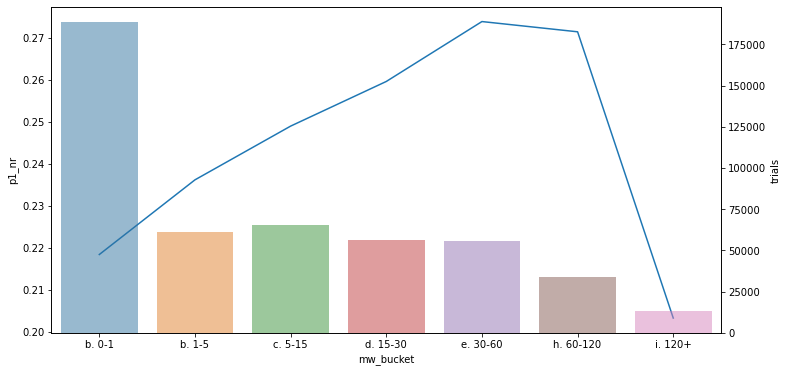

In [9]:
# matplotlib.rc_file_defaults()
# ax1 = sns.set_style(style=None, rc=None )

fig, ax1 = plt.subplots(figsize=(12,6))

sns.lineplot(data = day_1_gb, x = 'mw_bucket', y = 'p1_nr', ax=ax1)
# ax1.set(ylim=(0, 1))
ax2 = ax1.twinx()

sns.barplot(data = day_1_gb, x = 'mw_bucket', y = 'trials', alpha=0.5, ax=ax2);

In [10]:
day_1_gb

,mw_bucket,mw,trials,p1s,p1_nr
0,b. 0-1,0,188345,41134,0.218397
1,b. 1-5,1,61169,14447,0.236182
2,c. 5-15,5,65391,16281,0.248979
3,d. 15-30,15,56438,14652,0.259612
4,e. 30-60,30,55524,15207,0.273882
5,h. 60-120,60,33624,9127,0.271443
6,i. 120+,120,13441,2732,0.203259


In [11]:
day_1_gb = day_1_gb.drop([6])
day_1_gb['mw'].corr(day_1_gb['p1_nr'])

0.791143522323314

In [12]:
day_2_df = combo_df[['user_uid', 'success', 'day-1', 'day-2']]

In [13]:
col = 'total_mw'
day_2_df[col] = day_2_df['day-1'] + day_2_df['day-2']

day_2_df['mw_bucket'] = 'a. 0 min'
day_2_df['mw_bucket'][day_2_df[col] < 60.0] = 'b. 0-1'
day_2_df['mw_bucket'][day_2_df[col] >= 60.0] = 'b. 1-5'
day_2_df['mw_bucket'][day_2_df[col] >= 300.0] = 'c. 5-15'
day_2_df['mw_bucket'][day_2_df[col] >= 900.0] = 'd. 15-30'
day_2_df['mw_bucket'][day_2_df[col] >= 1800.0] = 'e. 30-60'
day_2_df['mw_bucket'][day_2_df[col] >= 3600.0] = 'h. 60-120'
day_2_df['mw_bucket'][day_2_df[col] >= 7200.0] = 'i. 120+'

day_2_df['mw'] = 0
day_2_df['mw'][day_2_df[col] >= 60.0] = 1
day_2_df['mw'][day_2_df[col] >= 300.0] = 5
day_2_df['mw'][day_2_df[col] >= 900.0] = 15
day_2_df['mw'][day_2_df[col] >= 1800.0] = 30
day_2_df['mw'][day_2_df[col] >= 3600.0] = 60
day_2_df['mw'][day_2_df[col] >= 7200.0] = 120

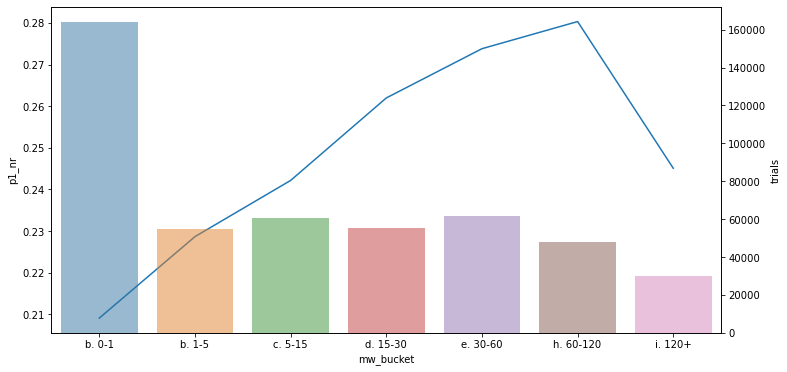

In [14]:
day_2_gb = day_2_df.groupby(by=['mw_bucket', 'mw']).agg(trials=pd.NamedAgg(column='user_uid', aggfunc='count'),
                                               p1s=pd.NamedAgg(column='success', aggfunc='sum')).reset_index()

day_2_gb['p1_nr'] = day_2_gb['p1s'] / day_2_gb['trials']

fig, ax1 = plt.subplots(figsize=(12,6))

sns.lineplot(data = day_2_gb, x = 'mw_bucket', y = 'p1_nr', ax=ax1)
# ax1.set(ylim=(0, 1))
ax2 = ax1.twinx()

sns.barplot(data = day_2_gb, x = 'mw_bucket', y = 'trials', alpha=0.5, ax=ax2);

In [15]:
day_2_gb

,mw_bucket,mw,trials,p1s,p1_nr
0,b. 0-1,0,163865,34262,0.209087
1,b. 1-5,1,54828,12537,0.228661
2,c. 5-15,5,60397,14626,0.242164
3,d. 15-30,15,55369,14506,0.261988
4,e. 30-60,30,61469,16832,0.273829
5,h. 60-120,60,48179,13507,0.280350
6,i. 120+,120,29825,7310,0.245096


In [16]:
# day_2_gb = day_2_gb.drop([6])
day_2_gb['mw'].corr(day_2_gb['p1_nr'])

0.35457546148806657

<ipython-input-17-d58b06af1e4e>:38: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax1 = plt.subplots(figsize=(8,4))


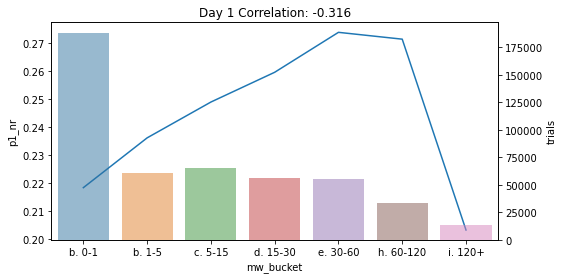

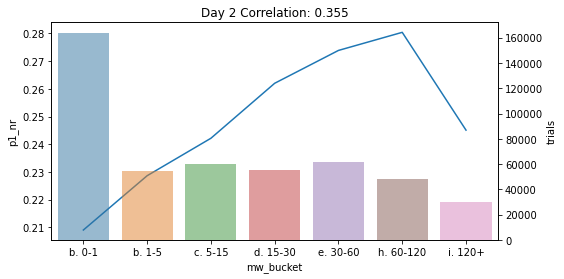

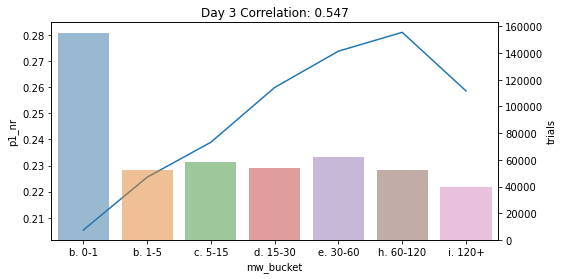

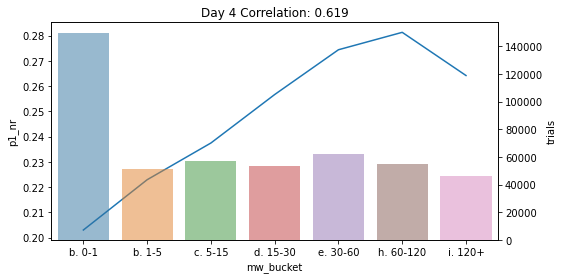

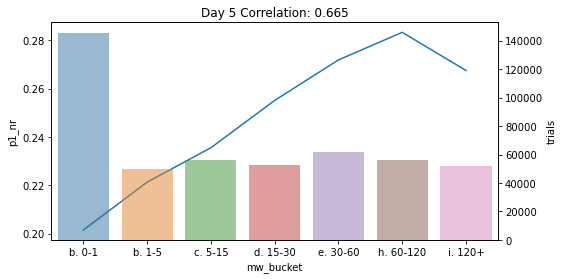

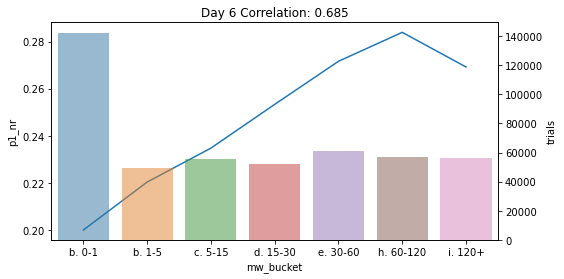

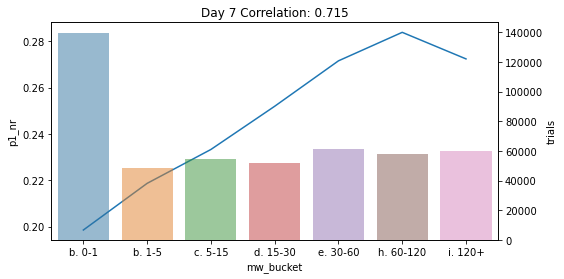

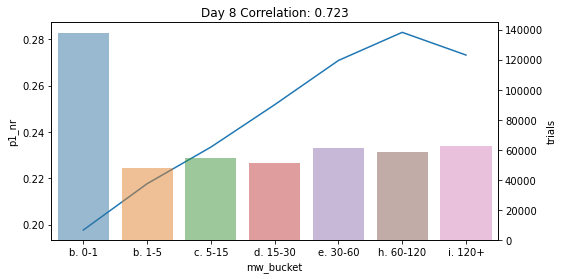

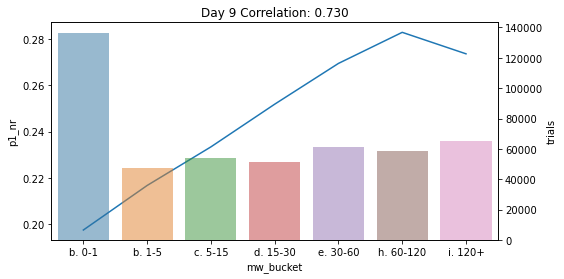

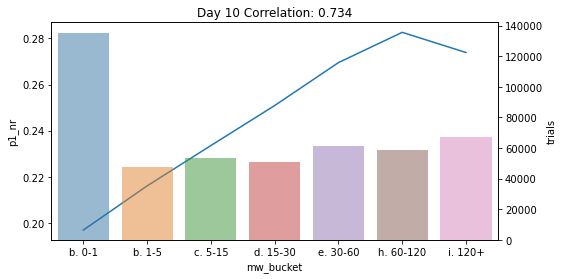

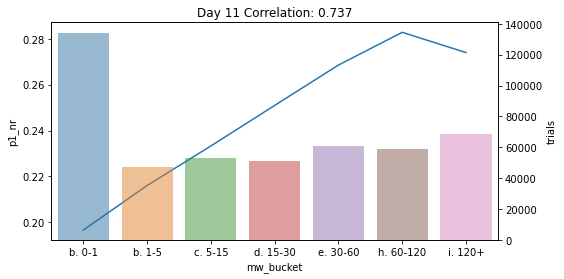

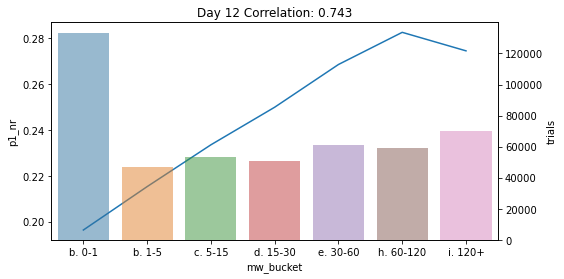

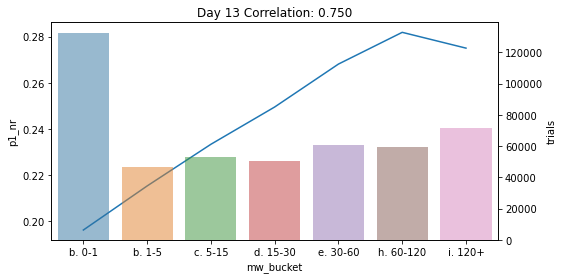

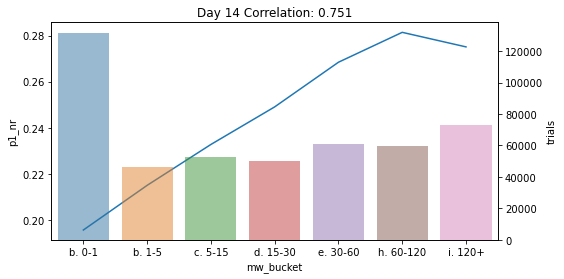

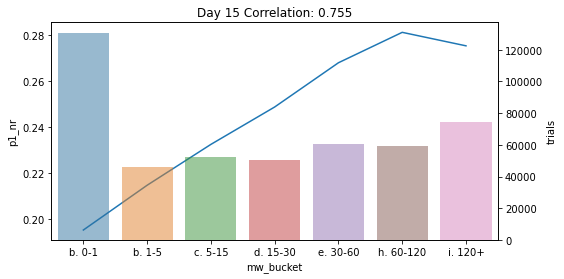

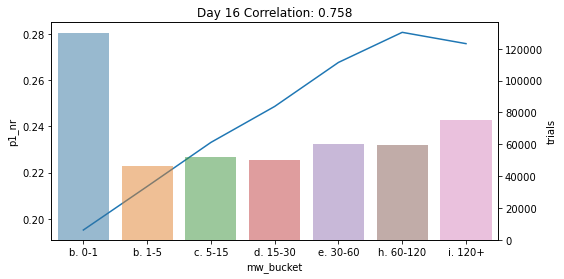

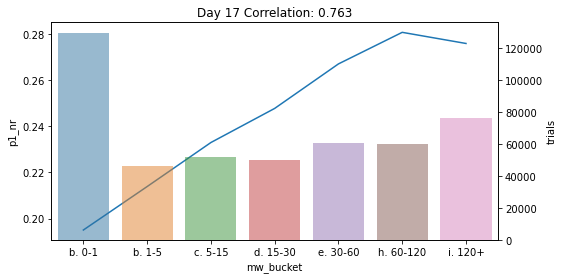

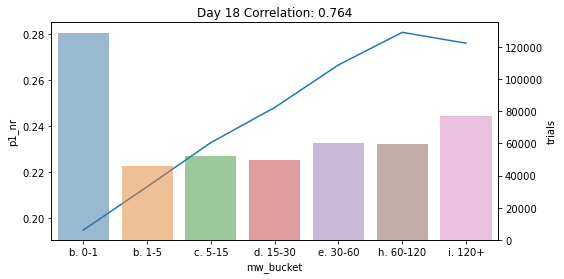

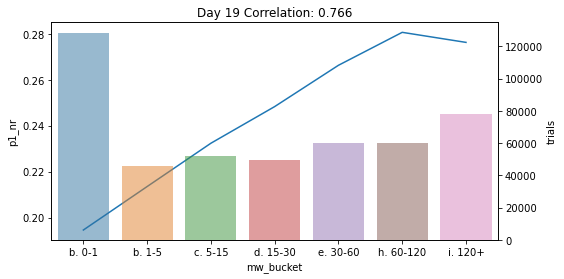

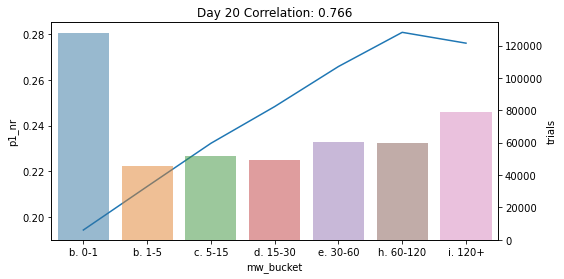

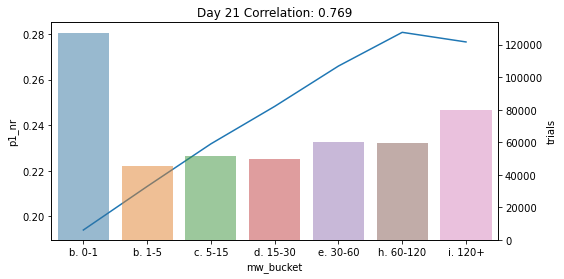

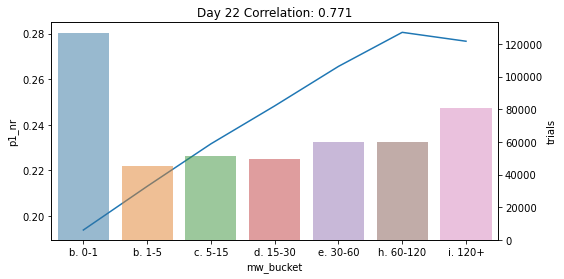

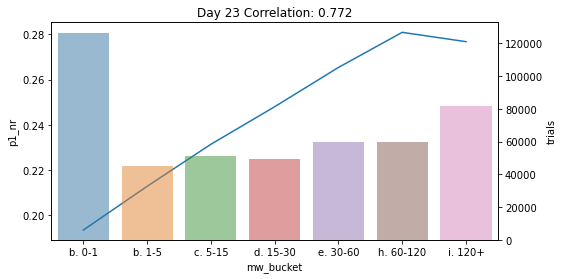

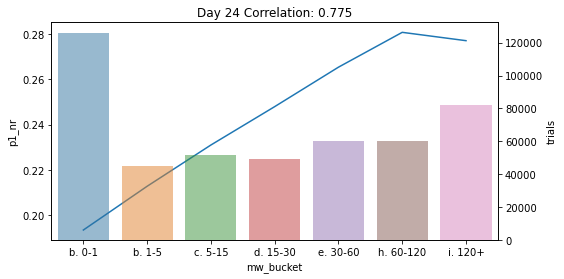

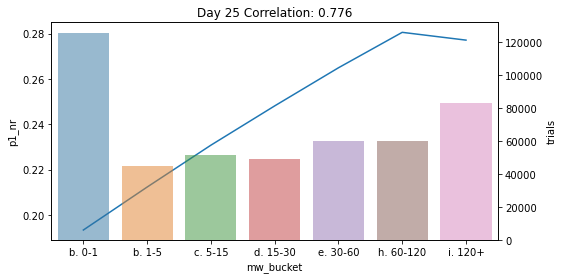

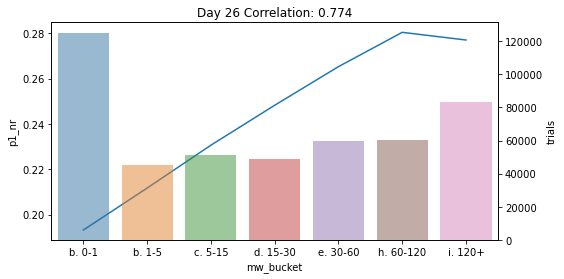

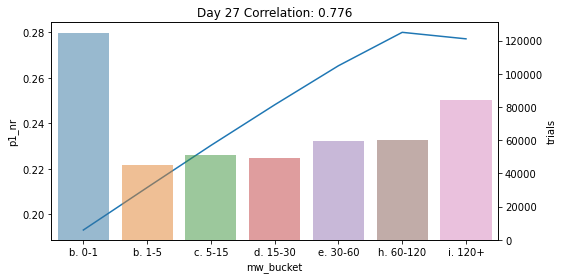

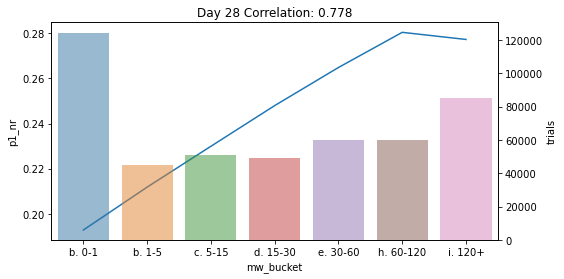

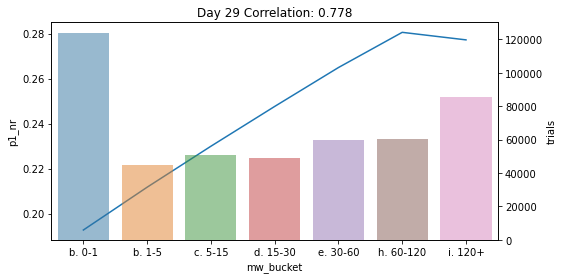

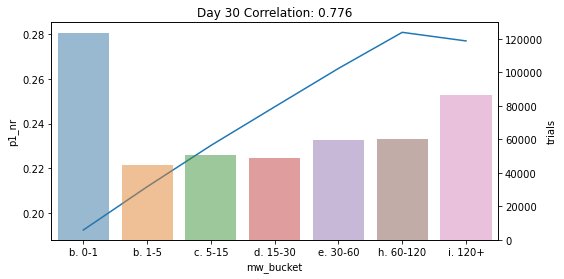

In [17]:
growing_col_list = ['user_uid', 'success']
just_min_watch_cols = []
for day in range(30):
    coltoadd = 'day-'+str(day+1)
    growing_col_list.append(coltoadd)
    just_min_watch_cols.append(coltoadd)
    #print(growing_col_list)
    this_graph_df = combo_df[growing_col_list]
    this_graph_df['total_min_watched'] = 0
    for c in just_min_watch_cols:
        this_graph_df['total_min_watched'] = this_graph_df['total_min_watched'] + this_graph_df[c]
    
    this_graph_df['mw_bucket'] = 'a. 0 min'
    this_graph_df['mw_bucket'][this_graph_df['total_min_watched'] < 60.0] = 'b. 0-1'
    this_graph_df['mw_bucket'][this_graph_df['total_min_watched'] >= 60.0] = 'b. 1-5'
    this_graph_df['mw_bucket'][this_graph_df['total_min_watched'] >= 300.0] = 'c. 5-15'
    this_graph_df['mw_bucket'][this_graph_df['total_min_watched'] >= 900.0] = 'd. 15-30'
    this_graph_df['mw_bucket'][this_graph_df['total_min_watched'] >= 1800.0] = 'e. 30-60'
    this_graph_df['mw_bucket'][this_graph_df['total_min_watched'] >= 3600.0] = 'h. 60-120'
    this_graph_df['mw_bucket'][this_graph_df['total_min_watched'] >= 7200.0] = 'i. 120+'

    this_graph_df['mw'] = 0
    this_graph_df['mw'][this_graph_df['total_min_watched'] >= 60.0] = 1
    this_graph_df['mw'][this_graph_df['total_min_watched'] >= 300.0] = 5
    this_graph_df['mw'][this_graph_df['total_min_watched'] >= 900.0] = 15
    this_graph_df['mw'][this_graph_df['total_min_watched'] >= 1800.0] = 30
    this_graph_df['mw'][this_graph_df['total_min_watched'] >= 3600.0] = 60
    this_graph_df['mw'][this_graph_df['total_min_watched'] >= 7200.0] = 120
    
    this_graph_gb = this_graph_df.groupby(by=['mw_bucket', 'mw']).agg(trials=pd.NamedAgg(column='user_uid', aggfunc='count'),
                                               p1s=pd.NamedAgg(column='success', aggfunc='sum')).reset_index()

    this_graph_gb['p1_nr'] = this_graph_gb['p1s'] / this_graph_gb['trials']
    
    this_corr = "{:.3f}".format(this_graph_gb['mw'].corr(this_graph_gb['p1_nr']))
    this_title = "Day " + str(day+1) + " Correlation: " + str(this_corr)

    fig, ax1 = plt.subplots(figsize=(8,4))
    sns.lineplot(data = this_graph_gb, x = 'mw_bucket', y = 'p1_nr', ax=ax1)
    
    ax1.set_title(this_title)
    ax2 = ax1.twinx()
    sns.barplot(data = this_graph_gb, x = 'mw_bucket', y = 'trials', alpha=0.5, ax=ax2)
    